In [53]:
# When we add the option to have multiple loss angles for the bulk
# and shear componenets of the coating, we need to change the 
# analytic formula.

In [54]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import math

matplotlib.rcParams['text.usetex'] = True
plt.style.use('dark_background')

In [55]:
data = np.genfromtxt("ChangingRadius.dat")


In [56]:
# Coating noise is on the third coloum
# coatingNoise = data[:,6]

r_0 = data[:,0]*(152.3108006676e-6)
kB = 1.3806488e-23
# Temperature used and defined in the code
T = 305.
# Frequency
f = 100.
# Some papers use this def of r0.
wm = r_0 * np.sqrt(2)

F0 =  0.001
d = 4.68e-6
R = 12500.e-6

# Loss angles of the coating.
# Recall for a substrate with a single coating
# phi_FusedSilica = 1.e-6
# phi_Iso_Ta2O5 = 4.e-4
# phi_iso_AlGaAs = 2.5e-5
# phi_AlGaAs = 2.5 e-5

phiSub = 1.6e-6

phiBulk = 7.75e-4
phiShear = 5.2e-7

# Possion ratio and Youngs modulus for a fused silica substrate.
ymSub = 72.E9
sigmaSub = 0.17

# Possion ratio and Youngs modulus for a fused silica coating.
ymCoat = 100.E9
sigmaCoat = 0.32

# Bulk and shear modulus for the coating, taken from Thorne + Blanford eq. 11.39
# We refer to mu as the shear modulus and K as the bulk modulus.

mu_coating = ymCoat/(2*(1 + sigmaCoat))
K_coating  = ymCoat/(3*(1 - 2*sigmaCoat))

# Bulk and shear modulus for the substrate, , taken from Thorne + Blanford eq. 11.39
mu_substrate = ymSub / (2*(1 + sigmaSub))
K_substrate  = ymSub / (3*(1 - 2*sigmaSub))

In [77]:
# This was the origonal formula used in the paper
# DOI: 	10.1088/1361-6382/aa9ccc
# analytic_defunct = np.sqrt((2*kB*T/((math.pi**2)*f))*((1-(sigmaSub**2))/(wm*YoungModSub))*(d/wm)*((phiCoat)/(YoungModSub*YoungModCoat*(1-sigmaCoat**2)*(1-sigmaSub**2)))*(YoungModCoat**2*(1+sigmaSub)**2*(1-2*sigmaSub)**2+YoungModSub**2*(1+sigmaCoat)**2*(1-2*sigmaCoat)))


# These equations are ones I derived. They are the analytic solutions to the bulk/shear energies.
# We define the coating energy in terms of the bulk/shear energies which are defined in terms of 

# Equation 17
K_theta = (K_substrate + (mu_substrate / 3) + mu_coating) / ( (K_coating + ((4 / 3) * mu_coating))*(K_substrate + (mu_substrate/3)) )
# Equation 18
K_zz = (K_substrate + (mu_substrate / 3) + (mu_coating / 3) - (K_coating / 2) ) / ( (K_coating + ((4 / 3) * mu_coating))*(K_substrate + (mu_substrate/3)) )

# Bulk and shear energies
analytic_bulk_energy = (d * K_coating * pow(K_theta, 2)) / (4 * math.pi * r_0**2)

analytic_shear_energy = ((2 * d * mu_coating  * (pow((K_theta - K_zz), 2) + pow(K_zz, 2))) - ((2 * d * mu_coating * pow(K_theta, 2))/3)) / (4 * math.pi * r_0**2)

analytic_bulk_energy_over_shear_energy = analytic_bulk_energy / analytic_shear_energy

# Coating Energy
analytic_coating_energy = (analytic_bulk_energy + analytic_shear_energy)

# Coating Thermal Noise
analytic_coating_thermal_noise = np.sqrt(((4 * kB * T) / (math.pi * f)) * (analytic_bulk_energy * phiBulk + analytic_shear_energy * phiShear))




In [78]:
coatingEnergy = data[:,4] * 1E-6

coatingNoise = data[:,6] / np.sqrt(f)

bulkEnergy = data[:,11] * 1e-6
shearEnergy = data[:,12] * 1e-6

BulkEnergyOverShearEnergyNumerical = bulkEnergy / shearEnergy

CoatEnergyNumerical = coatingEnergy[-1]
CoatThermalNoiseNumerical = coatingNoise[-1]

bulkEnergyNumerical = bulkEnergy[-1]
shearEnergyNumerical = shearEnergy[-1]


In [94]:
print("Analytic Bulk Energy is:   ", analytic_bulk_energy)
print("Numerical Bulk Energy is:    ", bulkEnergy, ".\n")

print("Analytic Shear Energy is:  ", analytic_shear_energy)
print("Numerical Shear Energy is: ", shearEnergy, ".\n")

print("Analytic Bulk Energy Over Shear Energy is: ", analytic_bulk_energy_over_shear_energy)
print("Analytic Bulk Energy Over Shear Energy is: ", BulkEnergyOverShearEnergyNumerical, ".\n")

print("Analytic Coating Energy is: ", analytic_coating_energy)
print("Numerical Coating Energy is: ", coatingEnergy, ".\n")

print("Analytic Coating Thermal Noise is:  ", analytic_coating_thermal_noise)
print("Numerical Coating Thermal Noise is: ", coatingNoise, ".\n")



Analytic Bulk Energy is:    [3.81559159e-09 9.53897898e-10 2.38474474e-10 5.96186186e-11
 1.49046547e-11]
Numerical Bulk Energy is:     [2.77720053e-09 8.00246795e-10 2.17462941e-10 5.70133772e-11
 1.46251066e-11] .

Analytic Shear Energy is:   [1.27099313e-09 3.17748283e-10 7.94370708e-11 1.98592677e-11
 4.96481692e-12]
Numerical Shear Energy is:  [6.67110355e-10 2.05140049e-10 6.17474702e-11 1.71871016e-11
 4.49232917e-12] .

Analytic Bulk Energy Over Shear Energy is:  [3.00205524 3.00205524 3.00205524 3.00205524 3.00205524]
Analytic Bulk Energy Over Shear Energy is:  [4.16303017 3.90097788 3.52181134 3.31721883 3.25557324] .

Analytic Coating Energy is:  [5.08658472e-09 1.27164618e-09 3.17911545e-10 7.94778863e-11
 1.98694716e-11]
Numerical Coating Energy is:  [3.44431089e-09 1.00538684e-09 2.79210411e-10 7.42004789e-11
 1.91174358e-11] .

Analytic Coating Thermal Noise is:   [1.25929335e-17 6.29646674e-18 3.14823337e-18 1.57411668e-18
 7.87058342e-19]
Numerical Coating Thermal Nois

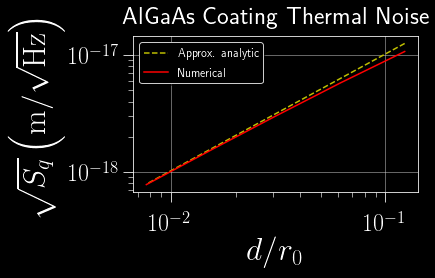

In [80]:
myAxisLabelSize=32
myTickLabelSize=24
myLegendLabelSize=10
myTitleSize=25

fig = plt.gcf()
ax = plt.gca()

gridwidth=0.5
gridcolor=(0.8,0.8,0.8)

ax.plot(d/r_0, analytic_coating_thermal_noise, marker='None', label='Approx. analytic', color='y', linestyle='dashed')
ax.plot(d/r_0, coatingNoise, marker='None', label='Numerical', color='r')
ax.set_xlabel('$d/r_0$', fontsize=myAxisLabelSize)

ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_ylim([6.9e-22, 5.9e-17])

ax.set_title('AlGaAs Coating Thermal Noise', fontsize=myTitleSize, color='W', y=1.04)
ax.set_ylabel(r'$\sqrt{S_q} \left(\mathrm{m}/\sqrt{\mathrm{Hz}}\right)$', fontsize=myAxisLabelSize)
ax.tick_params(axis='x', labelsize=myTickLabelSize, pad=12, length=10)
ax.tick_params(which='minor', length=5)
ax.tick_params(axis='y', labelsize=myTickLabelSize, length=10)
ax.grid(b=True, which='major', color=gridcolor, linestyle='solid', linewidth=gridwidth)
ax.legend(loc='upper left', shadow=True, fontsize=myLegendLabelSize, prop={'size': 12})

fig.tight_layout()
pdf = PdfPages('VaryBeamNoise_AlGaAs_theoretical.pdf')
pdf.savefig()
pdf.close()

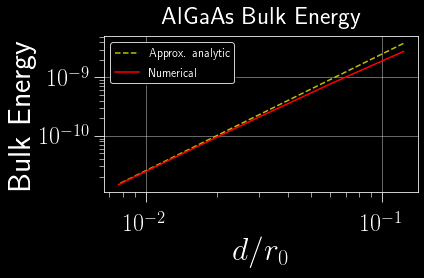

In [81]:
# Lets see how the bulk/shear energy changes as we increase the beam width
fig_1 = plt.gcf()
ax_1 = plt.gca()

# These first set of lines are Nick's original code.
ax_1.plot(d/r_0, analytic_bulk_energy, marker='None', label='Approx. analytic', color='y', linestyle='dashed')
ax_1.plot(d/r_0, bulkEnergy, marker='None', label='Numerical', color='r')
ax_1.set_xlabel('$d/r_0$', fontsize=myAxisLabelSize)

ax_1.set_yscale('log')
ax_1.set_xscale('log')
# ax.set_ylim([6.9e-22, 5.9e-17])

ax_1.set_title('AlGaAs Bulk Energy', fontsize=myTitleSize, color='W', y=1.04)
ax_1.set_ylabel('Bulk Energy', fontsize=myAxisLabelSize)
ax_1.tick_params(axis='x', labelsize=myTickLabelSize, pad=12, length=10)
ax_1.tick_params(which='minor', length=5)
ax_1.tick_params(axis='y', labelsize=myTickLabelSize, length=10)
ax_1.grid(b=True, which='major', color=gridcolor, linestyle='solid', linewidth=gridwidth)
ax_1.legend(loc='upper left', shadow=True, fontsize=myLegendLabelSize, prop={'size': 12})

fig_1.tight_layout()
pdf_1 = PdfPages('VaryBeamNoise_AlGaAs_Bulk_Energy_theoretical.pdf')
pdf_1.savefig()
pdf_1.close()

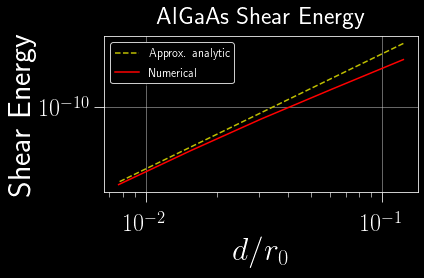

In [82]:
# Lets see how the bulk/shear energy changes as we increase the beam width
fig_2 = plt.gcf()
ax_2 = plt.gca()

# These first set of lines are Nick's original code.
ax_2.plot(d/r_0, analytic_shear_energy, marker='None', label='Approx. analytic', color='y', linestyle='dashed')
ax_2.plot(d/r_0, shearEnergy, marker='None', label='Numerical', color='r')
ax_2.set_xlabel('$d/r_0$', fontsize=myAxisLabelSize)

ax_2.set_yscale('log')
ax_2.set_xscale('log')
# ax.set_ylim([6.9e-22, 5.9e-17])

ax_2.set_title('AlGaAs Shear Energy', fontsize=myTitleSize, color='W', y=1.04)
ax_2.set_ylabel('Shear Energy', fontsize=myAxisLabelSize)
ax_2.tick_params(axis='x', labelsize=myTickLabelSize, pad=12, length=10)
ax_2.tick_params(which='minor', length=5)
ax_2.tick_params(axis='y', labelsize=myTickLabelSize, length=10)
ax_2.grid(b=True, which='major', color=gridcolor, linestyle='solid', linewidth=gridwidth)
ax_2.legend(loc='upper left', shadow=True, fontsize=myLegendLabelSize, prop={'size': 12})

fig_2.tight_layout()
pdf_2 = PdfPages('VaryBeamNoise_AlGaAs_Shear_Energy_theoretical.pdf')
pdf_2.savefig()
pdf_2.close()

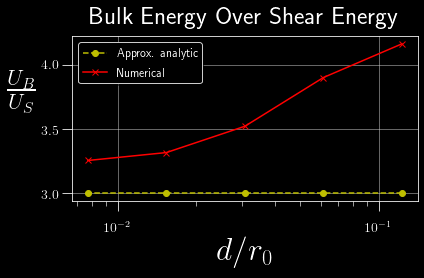

In [97]:
# Lets see how the bulk/shear energy changes as we increase the beam width
fig_3 = plt.gcf()
ax_3 = plt.gca()

# These first set of lines are Nick's original code.
ax_3.plot(d/r_0, analytic_bulk_energy_over_shear_energy, marker='o', label='Approx. analytic', color='y', linestyle='dashed')
ax_3.plot(d/r_0, BulkEnergyOverShearEnergyNumerical, marker='x', label='Numerical', color='r')
ax_3.set_xlabel('$d/r_0$', fontsize=myAxisLabelSize)


ax_3.set_xscale('log')
# ax.set_ylim([6.9e-22, 5.9e-17])

ax_3.set_title('Bulk Energy Over Shear Energy', fontsize=myTitleSize, color='W', y=1.04)
ax_3.set_ylabel(r'$\frac{U_B}{U_S}$', fontsize=myAxisLabelSize, rotation=0, labelpad=20)
ax_3.tick_params(axis='x', labelsize=14, pad=12, length=10)
ax_3.tick_params(axis='y', labelsize=14, length=10)
ax_3.tick_params(which='minor', length=5)
ax_3.grid(b=True, which='major', color=gridcolor, linestyle='solid', linewidth=gridwidth)
ax_3.legend(loc='upper left', shadow=True, fontsize=myLegendLabelSize, prop={'size': 12})

fig_3.tight_layout()
pdf_3 = PdfPages('VaryBeamNoise_AlGaAs_BulkEnergyOverShearEnergy_theoretical.pdf')
pdf_3.savefig()
pdf_3.close()